In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from util.load import DataLoader
from util.backtest import Backtest
from util.plot import (
    create_pairwise_scatter_plot,
    create_correlation_matrix,
    plot_backtest_results,
)

In [2]:
dataloader = DataLoader(data_dir="../data")
ticker = "kxhighny"
max_days = 100
df = dataloader.load_consolidated_daily_data(
    ticker, max_days=max_days, type_="polysignal"
)
df.drop(columns=["time", "ticker"]).head()

100%|██████████| 32/32 [00:00<00:00, 161.84it/s]


trade_id  time_to_strike  \
0  ff80791e-7eee-4808-be20-67ccd5d3b154       86378.686   
1  010623d1-0fce-4a11-ae5d-7ce883959998       86378.686   
2  0a46d905-5ee3-4358-a806-29372b7d482c       86378.686   
3  12a5ae0c-306c-4254-a269-d43e83555f3e       86378.686   
4  143aa66f-10ea-469f-b5af-c6567deda54a       86378.686   

   day_forecast_strike_dev  current_forecast_strike_dev  \
0                      1.9                        -11.9   
1                      1.9                        -11.9   
2                      1.9                        -11.9   
3                      1.9                        -11.9   
4                      1.9                        -11.9   

   day_current_forecast_dev  kalshi_strike_dev  polymk_strike_dev  \
0                      13.8                0.0             -4.239   
1                      13.8                0.0             -4.239   
2                      13.8                0.0             -4.239   
3                      13.8                0.0             -4.239   
4                      13.8                0.0             -4.239   

   kalshi_polymk_dev  kalshi_day_forecast_dev  polymk_day_forecast_dev  ...  \
0              4.239                      1.9                    6.139  ...   
1              4.239                      1.9                    6.139  ...   
2              4.239                      1.9                    6.139  ...   
3              4.239                      1.9                    6.139  ...   
4              4.239                      1.9                    6.139  ...   

   yes_price_sentiment_60  count_sentiment_60  yes_price_trend_60  \
0                  43.333             100.733                  -4   
1                  43.333             100.733                  -4   
2                  43.333             100.733                  -4   
3                  43.333             100.733                  -4   
4                  43.333             100.733                  -4   

   count_agg_120  yes_price_vol_120  count_vol_120  taker_side_sentiment_120  \
0           1511              2.637         99.877                       1.0   
1           1511              2.637         99.877                       1.0   
2           1511              2.637         99.877                       1.0   
3           1511              2.637         99.877                       1.0   
4           1511              2.637         99.877                       1.0   

   yes_price_sentiment_120  count_sentiment_120  yes_price_trend_120  
0                   43.333              100.733                   -4  
1                   43.333              100.733                   -4  
2                   43.333              100.733                   -4  
3                   43.333              100.733                   -4  
4                   43.333              100.733                   -4  

[5 rows x 56 columns]

In [3]:
df.describe()

time_to_strike  day_forecast_strike_dev  current_forecast_strike_dev  \
count    35722.000000             35722.000000                 35722.000000   
mean     47854.480523                 0.231362                    -7.456559   
std      17558.970714                 2.594903                     7.071070   
min          7.319000               -11.200000                   -34.000000   
25%      36357.222000                -1.400000                   -11.900000   
50%      44848.468500                 0.300000                    -5.600000   
75%      55014.219250                 1.800000                    -1.900000   
max      86399.922000                10.300000                     6.100000   

       day_current_forecast_dev  kalshi_strike_dev  polymk_strike_dev  \
count              35722.000000       35722.000000       35722.000000   
mean                   7.687921          -0.093220          -2.567358   
std                    7.201005           1.964392           3.333877   
min                   -1.800000          -7.378000         -11.934000   
25%                    1.825000          -1.431000          -4.916000   
50%                    5.100000          -0.036000          -2.445000   
75%                   12.900000           1.261000          -0.042500   
max                   32.200000           6.951000           6.449000   

       kalshi_polymk_dev  kalshi_day_forecast_dev  polymk_day_forecast_dev  \
count       35722.000000             35722.000000             35722.000000   
mean            2.474127                 0.324581                 2.798720   
std             2.601664                 1.816546                 3.108009   
min            -2.898000               -11.200000                -2.221000   
25%             0.318250                -0.733750                 0.334000   
50%             2.799000                 0.538500                 2.668000   
75%             4.368750                 1.533000                 5.149000   
max            10.673000                 7.700000                10.216000   

       day_forecast_percipitation  ...  yes_price_sentiment_60  \
count                35722.000000  ...            35722.000000   
mean                    29.156010  ...               36.036326   
std                     34.511747  ...               22.017967   
min                      0.000000  ...                3.000000   
25%                      1.000000  ...               18.000000   
50%                     17.000000  ...               33.377000   
75%                     37.000000  ...               50.899500   
max                    100.000000  ...               97.000000   

       count_sentiment_60  yes_price_trend_60  count_agg_120  \
count        35722.000000        35722.000000   35722.000000   
mean            33.484180           -1.897766    7167.914171   
std             30.981753           16.562931    6270.835108   
min              1.000000          -93.000000       1.000000   
25%             15.045000           -8.000000    3125.500000   
50%             25.216500           -1.000000    5291.000000   
75%             43.333000            4.000000    9222.000000   
max            786.500000           85.000000   37019.000000   

       yes_price_vol_120  count_vol_120  taker_side_sentiment_120  \
count       35722.000000   35722.000000              35722.000000   
mean            6.763604      55.752819                  0.567998   
std             5.772474      48.901580                  0.212698   
min             0.000000       0.000000                  0.000000   
25%             2.482000      24.240500                  0.443000   
50%             5.093000      42.978500                  0.578000   
75%             9.139000      71.033000                  0.708000   
max            30.263000     716.283000                  1.000000   

       yes_price_sentiment_120  count_sentiment_120  yes_price_trend_120  
count             35722.000000         35722.000000         35722

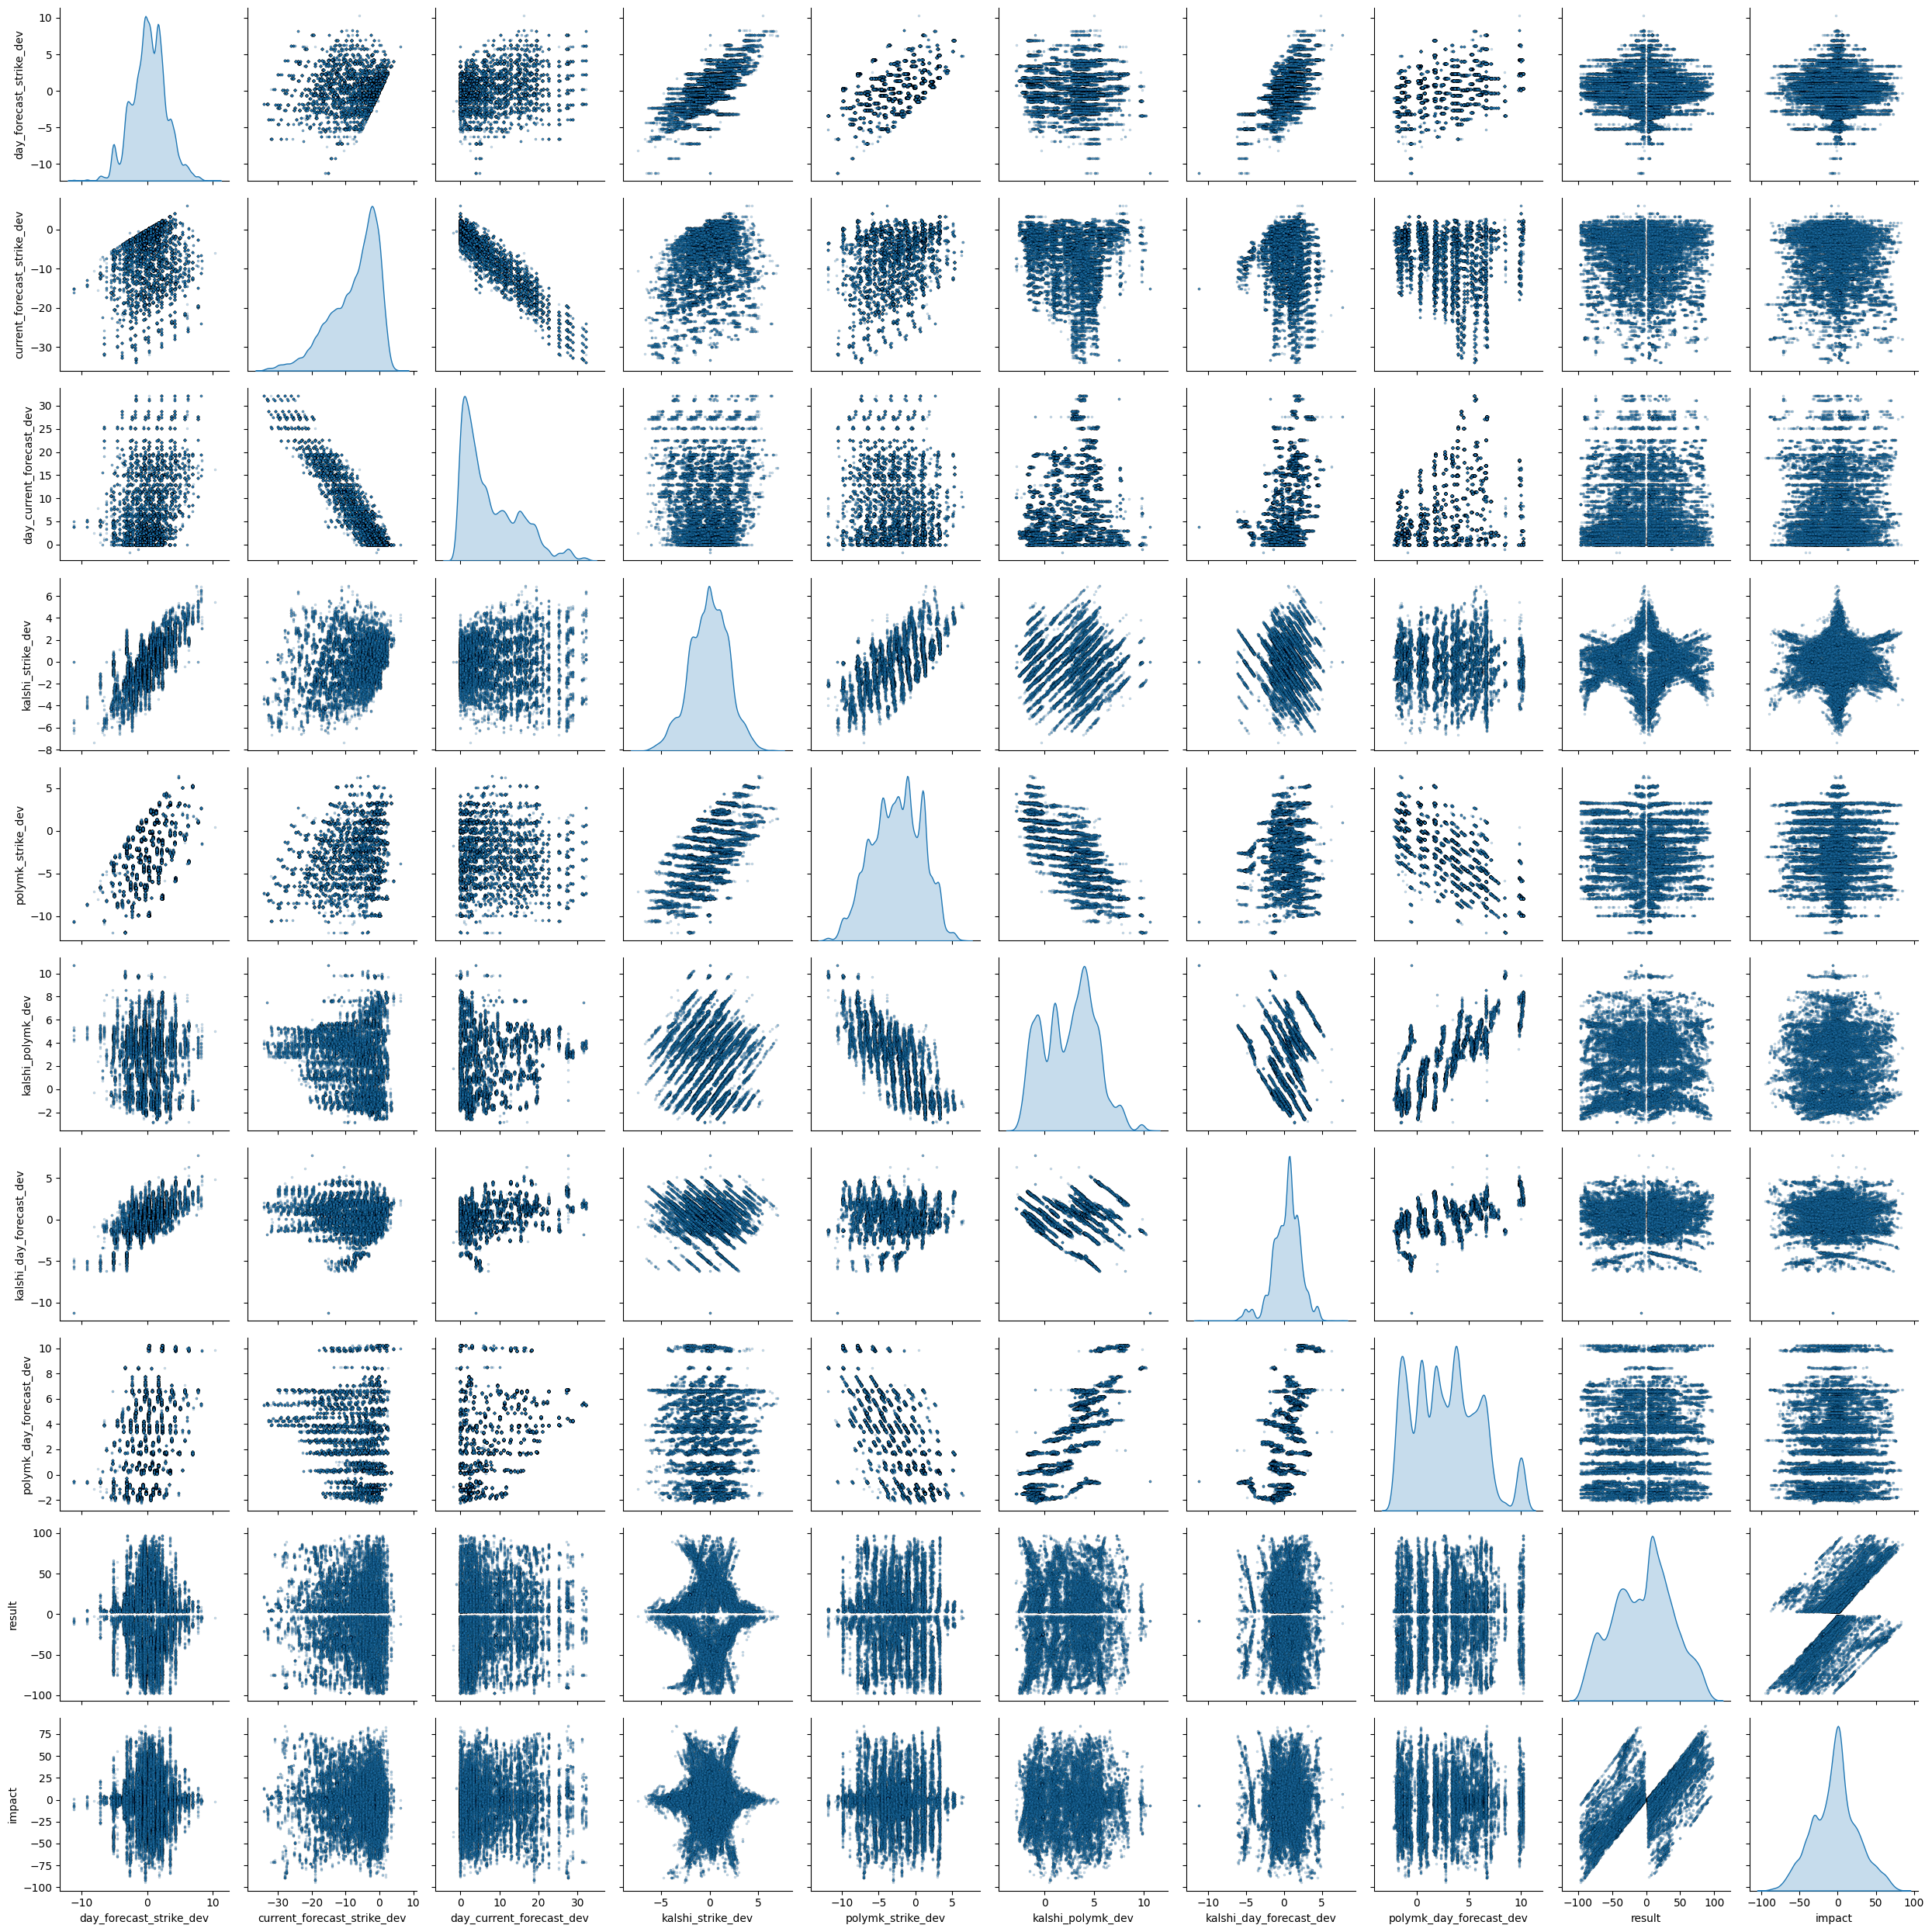

In [4]:
dev_features = [f for f in df.columns if f.endswith("dev")]
create_pairwise_scatter_plot(df, dev_features + ["result", "impact"])

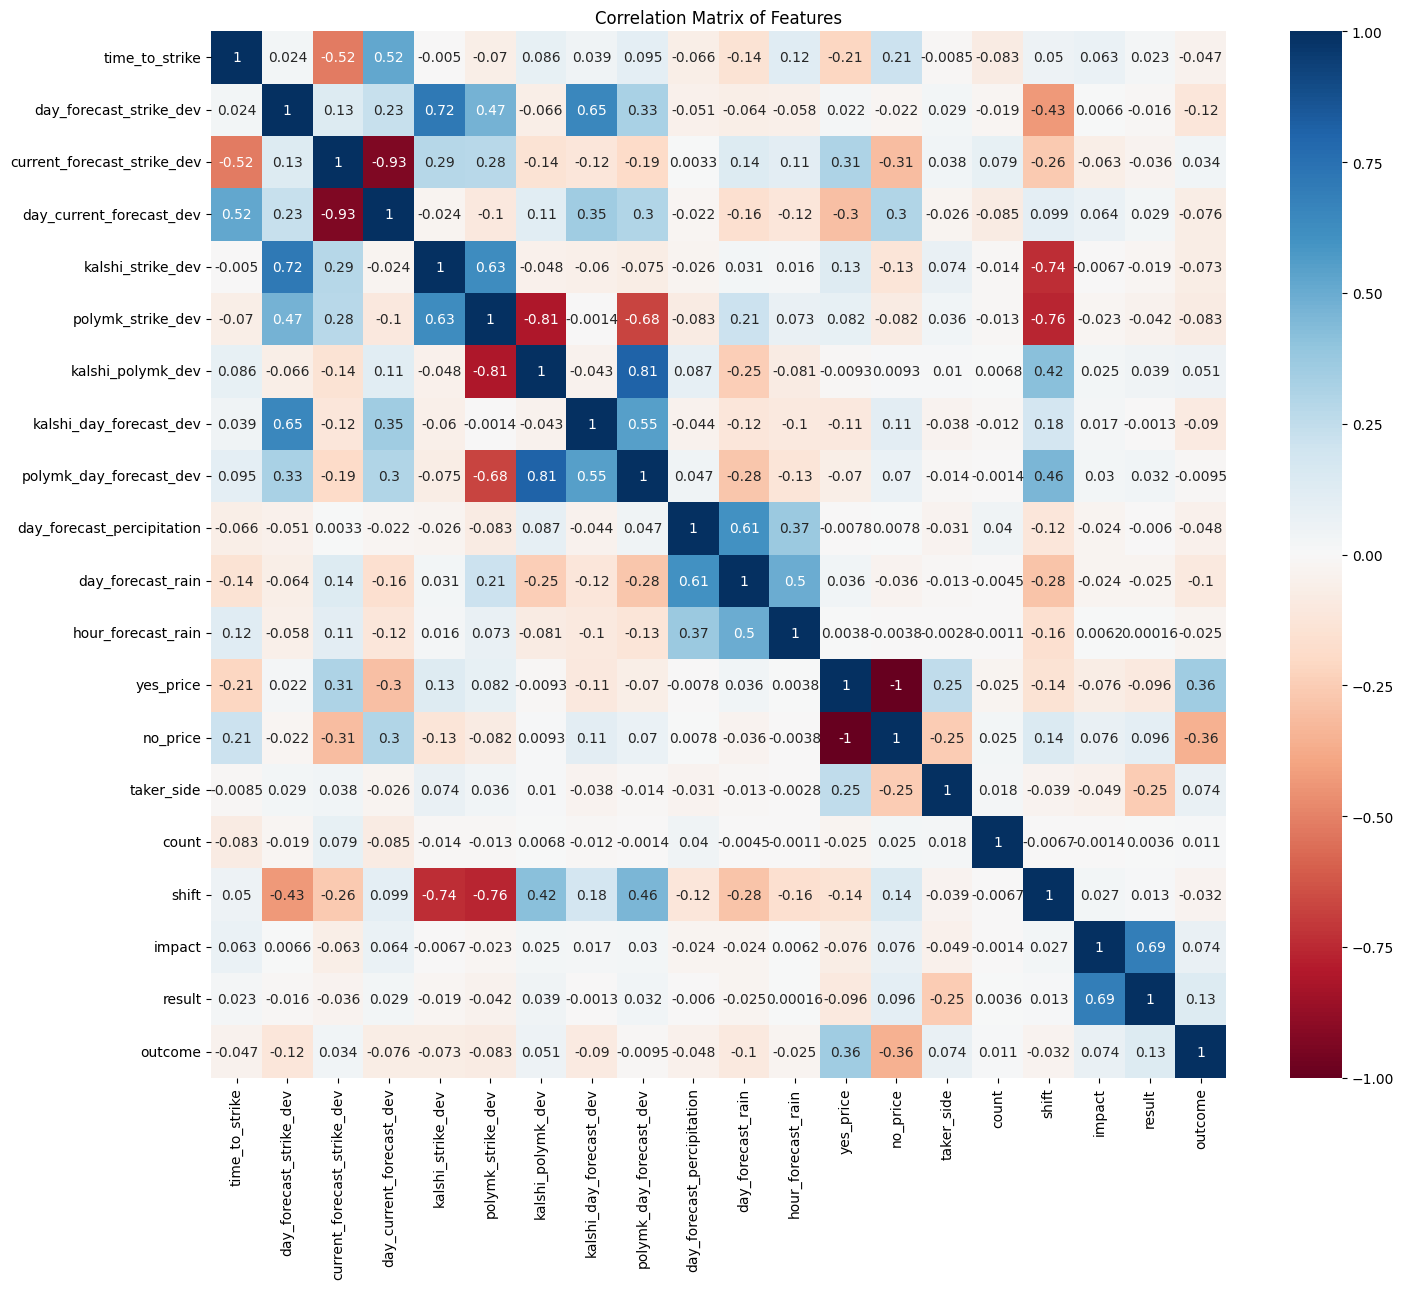

In [5]:
market_features = [
    f
    for f in df.columns.tolist()
    if not f.split("_")[-1].isdigit() and f not in ["time", "ticker", "trade_id"]
]
create_correlation_matrix(df, market_features)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, QuantileRegressor, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


class Model(object):
    def __init__(
        self,
        output_metric: str = "result",
        features: list[str] = None,
        outlier_threshold: float = 0.00,
    ):
        self.output_metric = output_metric
        self.features = features
        self.outlier_threshold = outlier_threshold
        self.pipeline = Pipeline(
            [
                ("robust_scaler", RobustScaler(unit_variance=True)),
                ("quantile_transformer", QuantileTransformer(n_quantiles=100, output_distribution="normal")),
                (
                    "voting",
                    VotingRegressor(
                        estimators=[
                            (
                                "gb",
                                GradientBoostingRegressor(
                                    n_estimators=50,
                                    learning_rate=0.01,
                                    max_depth=3,
                                    subsample=0.5,
                                    min_samples_split=50,
                                    random_state=42,
                                ),
                            ),
                            (
                                "rf",
                                RandomForestRegressor(
                                    n_estimators=50, max_depth=3, random_state=42
                                ),
                            ),
                            ("lasso", LinearRegression()),
                            ("knn_10", KNeighborsRegressor(n_neighbors=20)),
                        ],
                        n_jobs=-1,
                    ),
                ),
                
            ]
        )

    def __call__(
        self, train_data: pd.DataFrame, input_data: pd.DataFrame
    ) -> pd.DataFrame:
        if self.features is None:
            self.features = [
                f
                for f in train_data.columns.tolist()
                if (f not in ["time", "result", "impact", "ticker", "trade_id", "outcome"]) and (not f[-1].isdigit())
            ]
            # print(self.features)
        self.pipeline.fit(train_data[self.features], train_data[self.output_metric])
        input_predictions = self.pipeline.predict(input_data[self.features])
        train_predictions = self.pipeline.predict(train_data[self.features])
        return train_predictions, input_predictions

100%|██████████| 32/32 [00:33<00:00,  1.06s/it]


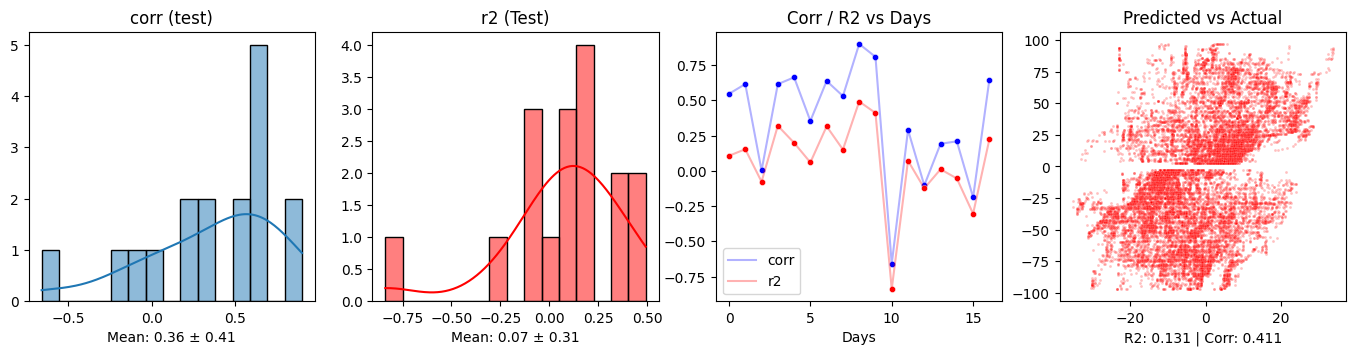

In [7]:
min_window_size, max_window_size, backtest_window = 15, 30, 50

output_metric = "result"
backtest = Backtest("kxhighny", data_dir="../data", backtest_window=backtest_window)
model = Model(features=None, output_metric=output_metric)

results, predictions, day_predictions, predictions_df = backtest.get_backtest_stats(
    model,
    min_window_size,
    max_window_size,
    output_metric=output_metric,
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="uniform")
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="normal")
)
plot_backtest_results(results, predictions)

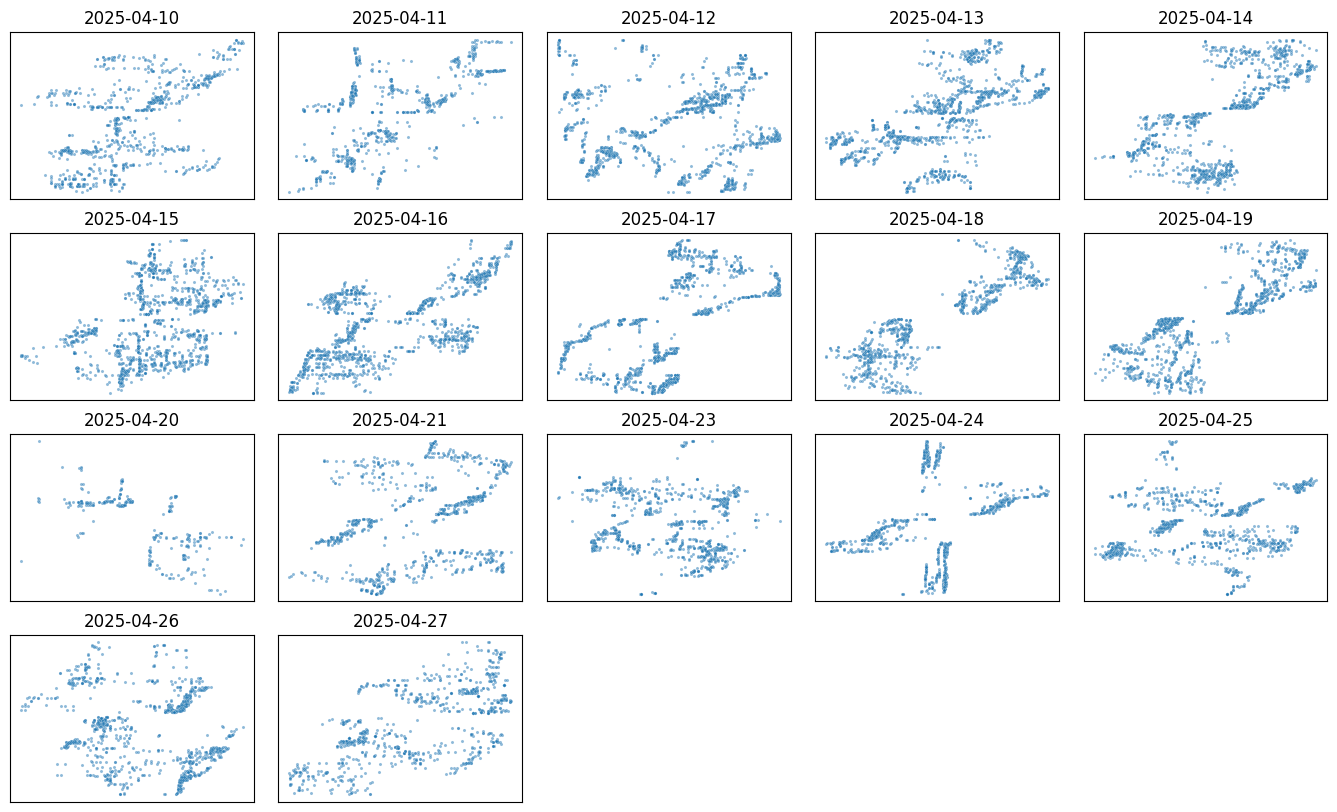

In [8]:
dates = sorted(list(day_predictions.keys()))
fig, axs = plt.subplots(len(dates) // 5 + 1, 5, figsize=(17, 10))

# Add padding between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)

for i in range(0, len(dates), 5):
    for idx, date in enumerate(dates[i:i+5]):
        if i//5 < axs.shape[0] and idx < axs.shape[1]:  # Check if the subplot exists
            # axs[i//5, idx].scatter(day_predictions[date]["y_pred"], day_predictions[date]["y_real"], alpha=0.5, s=2)
            sns.scatterplot(x="y_pred", y="y_real", data=day_predictions[date], ax=axs[i//5, idx], alpha=0.5, s=5)
            axs[i//5, idx].set_title(date)
            axs[i//5, idx].xaxis.set_visible(False)
            axs[i//5, idx].yaxis.set_visible(False)

# Hide empty subplots in the last row
for i in range(len(dates), (len(dates) // 5 + 1) * 5):
    row = i // 5
    col = i % 5
    if row < axs.shape[0] and col < axs.shape[1]:
        axs[row, col].set_visible(False)
plt.show()


In [9]:
np.mean(predictions_df[predictions_df['taker_side'] == 1]['result'])
np.mean(predictions_df[predictions_df['taker_side'] == 0]['result'])

np.float64(13.619694006672034)

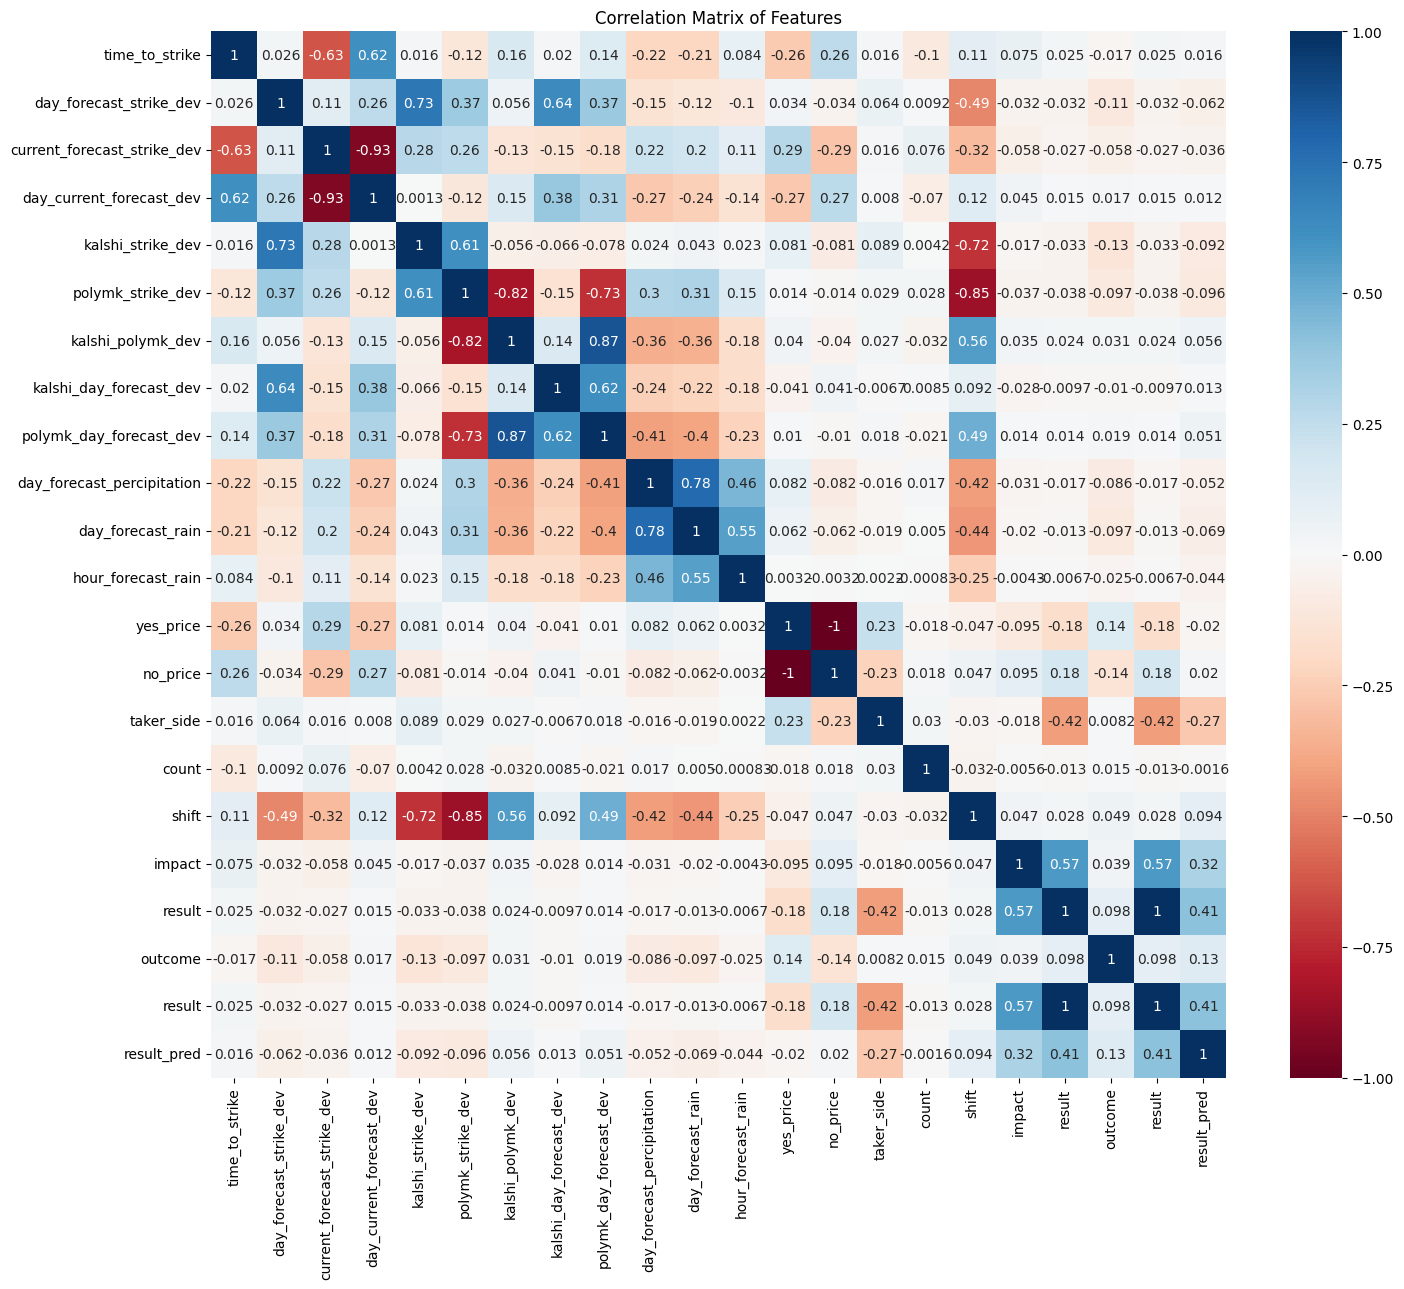

In [10]:
create_correlation_matrix(predictions_df, market_features + ['result', 'result_pred'])